In [2]:
# dataset download link: https://www.kaggle.com/datasets/team-ai/spam-text-message-classification/
import pandas as pd

# Specify the file path of your uploaded CSV file
file_path = '/content/SPAM text message 20170820 - Data.csv'  # Update this path to match your actual file path

# Create a DataFrame from the CSV file
df = pd.read_csv(file_path)

# Display the first 5 records of the DataFrame
df.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Count the number of 'spam' entries
spam_count = (df['Category'] == 'spam').sum()

# Count the number of 'ham' entries
ham_count = (df['Category'] == 'ham').sum()

# Display the counts
print(f"Number of 'spam' entries: {spam_count}")
print(f"Number of 'ham' entries: {ham_count}")


Number of 'spam' entries: 747
Number of 'ham' entries: 4825


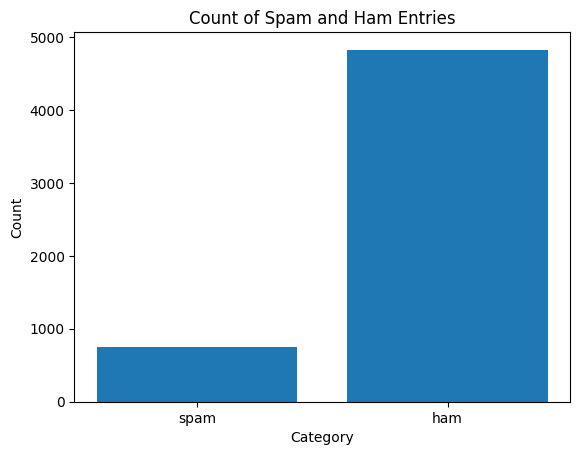

In [5]:
import matplotlib.pyplot as plt


# Create a bar chart
plt.bar(['spam', 'ham'], [spam_count, ham_count])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Spam and Ham Entries')
plt.show()

In [11]:
# label encoder method
import pandas as pd
from sklearn.preprocessing import LabelEncoder



# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Category' column
df['Category'] = label_encoder.fit_transform(df['Category'])

# Display the first 5 records of the DataFrame with encoded labels
df.head()

# Now, df['Category'] contains numerical labels


,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:

from sklearn.model_selection import train_test_split


# Split the dataset into features (X) and labels (y)
X = df['Message']
y = df['Category']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have X_train, X_test, y_train, and y_test for training and testing


In [13]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



# Convert text to lowercase
X_train = X_train.str.lower()

# Tokenize the text
max_words = 1000  # Set the maximum number of words to keep
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)

# Padding sequences to ensure they have the same length this one also is hyper parameter
max_sequence_length = 100  # Set the maximum sequence length this is hyper parameter
X_train = pad_sequences(X_train, maxlen=max_sequence_length)



In [14]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

# Define the model
model = Sequential()

# Add an Embedding layer
embedding_dim = 30
vocab_size = max_words  # Assuming you've defined max_words earlier
input_length = max_sequence_length  # Assuming you've defined max_sequence_length earlier
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))

# Add an LSTM layer
lstm_units = 256
model.add(LSTM(units=lstm_units))

# Optional Dropout layer (uncomment if needed)
# model.add(Dropout(0.5))

# Add a Dense layer for classification with sigmoid activation
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 30)           30000     
                                                                 
 lstm (LSTM)                 (None, 256)               293888    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 324145 (1.24 MB)
Trainable params: 324145 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:

# Fit the model for 10 epochs
epochs = 10

history = model.fit(
    X_train,  # Input features
    y_train,  # Target labels
    epochs=epochs,
    batch_size=64,  # Adjust batch size as needed
    validation_split=0.2,  # Optional: Validation split if you want to monitor validation loss
    verbose=1  # Set to 1 for progress updates, 0 for no updates
)


Epoch 1/10
56/56 [==============================] - 28s 449ms/step - loss: 0.4053 - accuracy: 0.8645 - val_loss: 0.2350 - val_accuracy: 0.8879
Epoch 2/10
56/56 [==============================] - 24s 432ms/step - loss: 0.0881 - accuracy: 0.9731 - val_loss: 0.0829 - val_accuracy: 0.9765
Epoch 3/10
56/56 [==============================] - 26s 456ms/step - loss: 0.0445 - accuracy: 0.9857 - val_loss: 0.0949 - val_accuracy: 0.9731
Epoch 4/10
56/56 [==============================] - 26s 457ms/step - loss: 0.0374 - accuracy: 0.9899 - val_loss: 0.0803 - val_accuracy: 0.9731
Epoch 5/10
56/56 [==============================] - 26s 456ms/step - loss: 0.0251 - accuracy: 0.9927 - val_loss: 0.0680 - val_accuracy: 0.9809
Epoch 6/10
56/56 [==============================] - 25s 451ms/step - loss: 0.0171 - accuracy: 0.9958 - val_loss: 0.0620 - val_accuracy: 0.9821
Epoch 7/10
56/56 [==============================] - 25s 449ms/step - loss: 0.0130 - accuracy: 0.9969 - val_loss: 0.0655 - val_accuracy: 0.9832

In [16]:
# now we have to vectorize x_test also, before we did for x_train
# Tokenize the text in X_test
X_test = tokenizer.texts_to_sequences(X_test)

# Padding sequences to ensure they have the same length as X_train
X_test = pad_sequences(X_test, maxlen=max_sequence_length)


In [17]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

# Print the test loss and accuracy
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


35/35 [==============================] - 4s 122ms/step - loss: 0.0773 - accuracy: 0.9857
Test loss: 0.0773
Test accuracy: 0.9857
